###TAI911S ASSIGNMENT 1
##PROBLEM 1
##PART 2: Build Regression Model to predict Household waste in dairy products

##Group Members:
#Sakaria Nekwaya 214059286
#Hambeleleni Shaningwa 213091704

##IMPORT THE NECESSARY PACKAGES

In [106]:
using CSV #import CSV File
using DataFrames #covert CSV file into a Dataframe
using Statistics #exploratory data analysis
using Plots #scatter plot
using StatsBase #describe the data
using GLM #Linear regression model
using Random

#Load the CSV Dataset

In [59]:
df = CSV.read("global_food_wastage_dataset.csv", DataFrame)

Row,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64
1,Australia,2019,Fruits & Vegetables,19268.6,18686.7,72.69,87.59,53.64
2,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
3,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
4,France,2023,Fruits & Vegetables,46299.7,40551.2,120.19,953.05,31.91
5,France,2023,Beverages,33096.6,36980.8,104.74,1105.47,36.06
6,India,2024,Fruits & Vegetables,11962.9,11196.0,136.21,1311.91,37.09
7,Germany,2024,Prepared Food,45038.7,39191.2,179.27,1349.45,68.93
8,China,2019,Fruits & Vegetables,12791.2,12233.3,90.8,1229.29,59.9
9,UK,2019,Meat & Seafood,14795.6,14347.0,128.91,450.33,59.01


In [60]:
#Filter rows to show only rows with Dairy Products in Food Category
dairy_df = filter(row -> row."Food Category" == "Dairy Products", df)
#Display the new Dataframe
dairy_df

Row,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64
1,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
2,Russia,2020,Dairy Products,13679.6,14249.8,182.75,776.16,51.14
3,USA,2022,Dairy Products,8731.68,10040.1,63.83,543.41,42.96
4,Italy,2023,Dairy Products,46189.1,42351.8,150.95,253.83,33.01
5,China,2021,Dairy Products,16464.4,18670.3,37.64,1184.69,48.42
6,Saudi Arabia,2023,Dairy Products,12894.2,13051.5,160.37,418.74,46.87
7,Mexico,2019,Dairy Products,20682.5,18331.2,75.79,789.69,66.86
8,South Korea,2018,Dairy Products,2995.27,3247.61,47.23,592.16,49.19
9,Brazil,2018,Dairy Products,21847.0,20986.5,84.77,846.22,34.63


In [61]:
#First 5 rows
first(dairy_df, 5)

Row,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64
1,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
2,Russia,2020,Dairy Products,13679.6,14249.8,182.75,776.16,51.14
3,USA,2022,Dairy Products,8731.68,10040.1,63.83,543.41,42.96
4,Italy,2023,Dairy Products,46189.1,42351.8,150.95,253.83,33.01
5,China,2021,Dairy Products,16464.4,18670.3,37.64,1184.69,48.42


In [62]:
#Data Structure
show(dairy_df)

616×8 DataFrame
 Row │ Country       Year   Food Category   Total Waste (Tons)  Economic Loss  ⋯
     │ String15      Int64  String31        Float64             Float64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Germany        2022  Dairy Products             9700.16                 ⋯
   2 │ Russia         2020  Dairy Products            13679.6
   3 │ USA            2022  Dairy Products             8731.68
   4 │ Italy          2023  Dairy Products            46189.1
   5 │ China          2021  Dairy Products            16464.4                  ⋯
   6 │ Saudi Arabia   2023  Dairy Products            12894.2
   7 │ Mexico         2019  Dairy Products            20682.5
   8 │ South Korea    2018  Dairy Products             2995.27
   9 │ Brazil         2018  Dairy Products            21847.0                  ⋯
  10 │ Spain          2023  Dairy Products            13937.3
  11 │ Japan          2024  Dairy Products            47567.1


In [63]:
#Summary Statistics
describe(dairy_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Country,,Argentina,,USA,0,String15
2,Year,2020.99,2018,2021.0,2024,0,Int64
3,Food Category,,Dairy Products,,Dairy Products,0,String31
4,Total Waste (Tons),24824.9,536.73,23919.3,49946.2,0,Float64
5,Economic Loss (Million $),24713.4,612.11,23365.0,58558.0,0,Float64
6,Avg Waste per Capita (Kg),111.351,20.2,111.135,199.71,0,Float64
7,Population (Million),708.267,12.57,753.74,1396.11,0,Float64
8,Household Waste (%),50.6764,30.15,51.24,70.0,0,Float64


In [64]:
#Count Missing Values
[col => count(ismissing, dairy_df[!, col]) for col in names(dairy_df)]

8-element Vector{Pair{String, Int64}}:
                    "Country" => 0
                       "Year" => 0
              "Food Category" => 0
         "Total Waste (Tons)" => 0
 "Economic Loss (Million \$)" => 0
  "Avg Waste per Capita (Kg)" => 0
       "Population (Million)" => 0
        "Household Waste (%)" => 0

In [65]:
#Correlation Matrix
cor_mat = cor(Matrix(dairy_df[:, [4,5,6,7,8]]))
println(cor_mat)

[1.0 0.9753134210623844 -0.012873476706822307 -0.020375008428833073 0.021801884529227367; 0.9753134210623844 1.0 -0.01700516126203687 -0.017450684017847037 0.02233525873824248; -0.012873476706822307 -0.01700516126203687 1.0 0.005309520510987661 0.019960392779861596; -0.020375008428833073 -0.017450684017847037 0.005309520510987661 1.0 0.04304611847531583; 0.021801884529227367 0.02233525873824248 0.019960392779861596 0.04304611847531583 1.0]


#Rename the column names to valid symbols

In [74]:
rename!(dairy_df, :"Total Waste (Tons)" => :TotalWaste, :"Economic Loss (Million \$)" => :EconomicLoss, :"Avg Waste per Capita (Kg)" => :AvgWastePerCapita, :"Population (Million)" => :Population, :"Household Waste (%)" => :HouseholdWaste)

Row,Country,Year,Food Category,TotalWaste,EconomicLoss,AvgWastePerCapita,Population,HouseholdWaste
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64
1,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
2,Russia,2020,Dairy Products,13679.6,14249.8,182.75,776.16,51.14
3,USA,2022,Dairy Products,8731.68,10040.1,63.83,543.41,42.96
4,Italy,2023,Dairy Products,46189.1,42351.8,150.95,253.83,33.01
5,China,2021,Dairy Products,16464.4,18670.3,37.64,1184.69,48.42
6,Saudi Arabia,2023,Dairy Products,12894.2,13051.5,160.37,418.74,46.87
7,Mexico,2019,Dairy Products,20682.5,18331.2,75.79,789.69,66.86
8,South Korea,2018,Dairy Products,2995.27,3247.61,47.23,592.16,49.19
9,Brazil,2018,Dairy Products,21847.0,20986.5,84.77,846.22,34.63


In [22]:
##Exploratory Data Analysis (EDA)

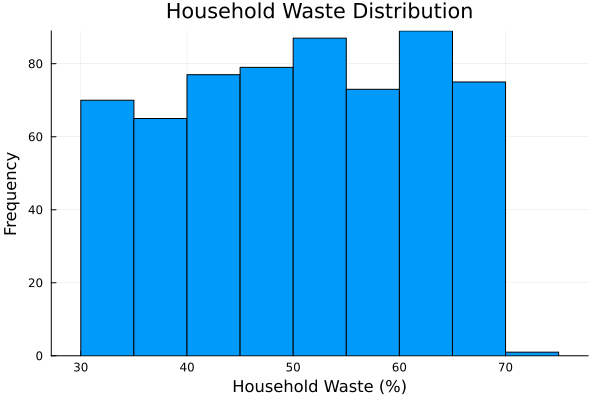

In [76]:
#1. Distribution of Household Waste in Dairy Products
histogram(dairy_df.HouseholdWaste, title="Household Waste Distribution", xlabel="Household Waste (%)", ylabel="Frequency", legend=false)

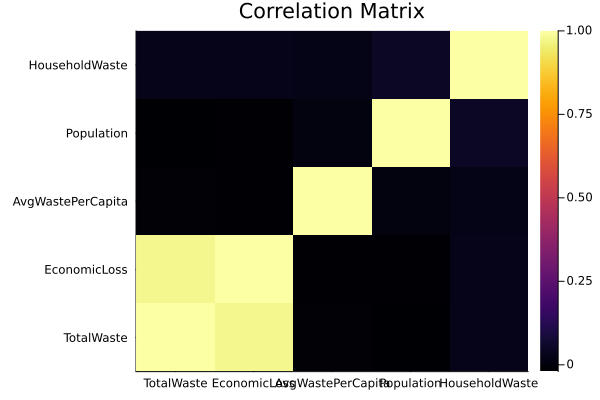

In [77]:
#Correlation Heat Map
cor_matrix = cor(Matrix(dairy_df[:, [:TotalWaste, :EconomicLoss, :AvgWastePerCapita, :Population, :HouseholdWaste]]))
heatmap(names(dairy_df[:, [:TotalWaste, :EconomicLoss, :AvgWastePerCapita, :Population, :HouseholdWaste]]), names(dairy_df[:, [:TotalWaste, :EconomicLoss, :AvgWastePerCapita, :Population, :HouseholdWaste]]), cor_matrix, title="Correlation Matrix")

In [ ]:
#The correlation matrix shows that theres no strong relationship between Household Waste and other features

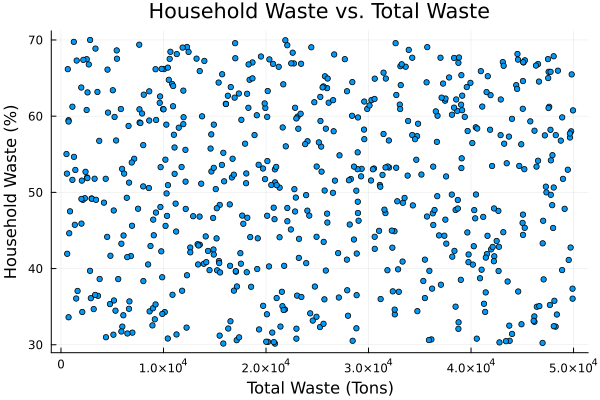

In [78]:
#1. Scatter Plot to determine correlation
scatter(dairy_df.TotalWaste, dairy_df.HouseholdWaste, title="Household Waste vs. Total Waste", xlabel="Total Waste (Tons)", ylabel="Household Waste (%)", marker=(:circle, 3), legend=false)

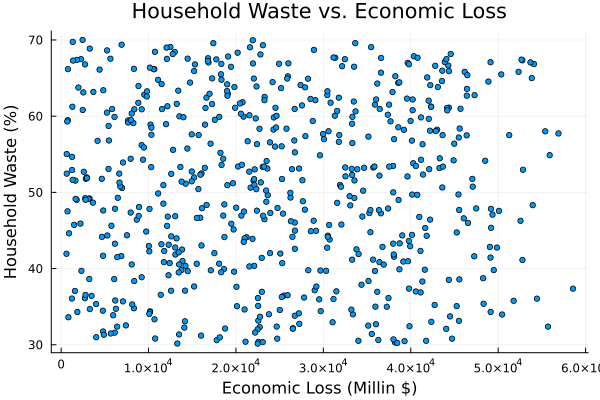

In [79]:
scatter(dairy_df.EconomicLoss, dairy_df.HouseholdWaste, title="Household Waste vs. Economic Loss", xlabel="Economic Loss (Millin \$)", ylabel="Household Waste (%)", marker=(:circle, 3), legend=false)

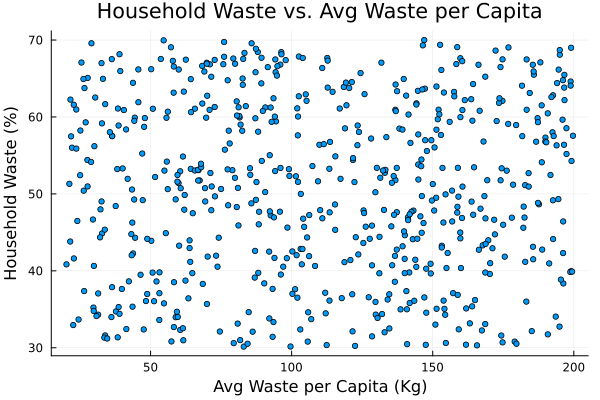

In [80]:
scatter(dairy_df.AvgWastePerCapita, dairy_df.HouseholdWaste, title="Household Waste vs. Avg Waste per Capita", xlabel="Avg Waste per Capita (Kg)", ylabel="Household Waste (%)", marker=(:circle, 3), legend=false)

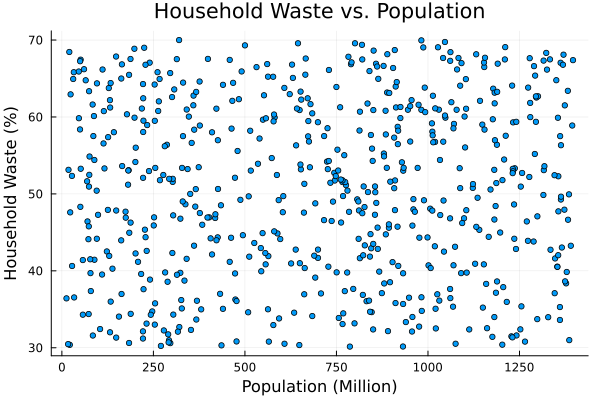

In [81]:
scatter(dairy_df.Population, dairy_df.HouseholdWaste, title="Household Waste vs. Population", xlabel="Population (Million)", ylabel="Household Waste (%)", marker=(:circle, 3), legend=false)

##Summary
#There is no meangful correlations between Household Waste and other features

In [242]:
n = nrow(dairy_df)

616

In [92]:
# Define target variable (Economic Loss)
y = dairy_df[:, :HouseholdWaste]

# Select feature columns
X = select(dairy_df, Not(:HouseholdWaste))

Row,Country,Year,Food Category,TotalWaste,EconomicLoss,AvgWastePerCapita,Population
,String15,Int64,String31,Float64,Float64,Float64,Float64
1,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11
2,Russia,2020,Dairy Products,13679.6,14249.8,182.75,776.16
3,USA,2022,Dairy Products,8731.68,10040.1,63.83,543.41
4,Italy,2023,Dairy Products,46189.1,42351.8,150.95,253.83
5,China,2021,Dairy Products,16464.4,18670.3,37.64,1184.69
6,Saudi Arabia,2023,Dairy Products,12894.2,13051.5,160.37,418.74
7,Mexico,2019,Dairy Products,20682.5,18331.2,75.79,789.69
8,South Korea,2018,Dairy Products,2995.27,3247.61,47.23,592.16
9,Brazil,2018,Dairy Products,21847.0,20986.5,84.77,846.22


##FIT A LINEAR REGRESSION MODEL

In [236]:
using GLM

In [254]:
#Build Linear Regression Model since there is a strong linear Distribution between Economic Loss and Total Waste
model = lm(@formula(HouseholdWaste ~ TotalWaste + EconomicLoss + AvgWastePerCapita + Population), dairy_df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

HouseholdWaste ~ 1 + TotalWaste + EconomicLoss + AvgWastePerCapita + Population

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                         Coef.   Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)        48.8681      1.58197      30.89    <1e-99  45.7614       51.9749
TotalWaste          1.43462e-6  0.000144203   0.01    0.9921  -0.000281759   0.000284629
EconomicLoss        1.69095e-5  0.000142871   0.12    0.9058  -0.000263668   0.000297487
AvgWastePerCapita   0.00443976  0.00891646    0.50    0.6187  -0.0130709     0.0219504
Population          0.0012148   0.00113231    1.07    0.2838  -0.0010089     0.0034385
───────────────────────

In [266]:
#Predict Household Wastae in dairy products
dairy_df[!, :PredictedHouseholdWaste] = GLM.predict(model)
println("First 10 predictions")
first(dairy_df, 10)

First 10 predictions


Row,Country,Year,Food Category,TotalWaste,EconomicLoss,AvgWastePerCapita,Population,HouseholdWaste,PredictedHouseholdWaste
,String15,Int64,String31,Float64,Float64,Float64,Float64,Float64,Float64
1,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08,50.9961
2,Russia,2020,Dairy Products,13679.6,14249.8,182.75,776.16,51.14,50.883
3,USA,2022,Dairy Products,8731.68,10040.1,63.83,543.41,42.96,49.994
4,Italy,2023,Dairy Products,46189.1,42351.8,150.95,253.83,33.01,50.6291
5,China,2021,Dairy Products,16464.4,18670.3,37.64,1184.69,48.42,50.8137
6,Saudi Arabia,2023,Dairy Products,12894.2,13051.5,160.37,418.74,46.87,50.328
7,Mexico,2019,Dairy Products,20682.5,18331.2,75.79,789.69,66.86,50.5036
8,South Korea,2018,Dairy Products,2995.27,3247.61,47.23,592.16,49.19,49.8564
9,Brazil,2018,Dairy Products,21847.0,20986.5,84.77,846.22,34.63,50.6587


In [268]:
# Split data into features and target
X = select(dairy_df, Not(:HouseholdWaste))
y = dairy_df.HouseholdWaste

616-element Vector{Float64}:
 48.08
 51.14
 42.96
 33.01
 48.42
 46.87
 66.86
 49.19
 34.63
 40.63
 65.82
 38.36
 34.38
  ⋮
 47.88
 69.75
 32.11
 51.28
 66.37
 67.25
 66.79
 50.24
 53.04
 45.13
 66.21
 62.94

In [270]:
# Split data (80% Training, 20% Testing)
train, test = partition(eachindex(y), 0.8, shuffle=true)

([51, 166, 183, 272, 85, 170, 541, 260, 162, 445  …  127, 58, 173, 211, 295, 351, 537, 507, 93, 490], [546, 321, 517, 203, 385, 264, 525, 470, 598, 610  …  155, 168, 338, 214, 220, 366, 46, 270, 315, 63])

In [156]:
using LinearAlgebra
using Random
using Statistics

In [160]:
Random.seed!(123)
n_samples = 616
n_features = 8

5

#USING RANDOM REGRESSOR MODEL

In [138]:
using Random
using DecisionTree: RandomForestRegressor

In [146]:
rf_model = RandomForestRegressor(n_trees=100)

RandomForestRegressor
n_trees:             100
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    5
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            nothing